# In class project: Linear regression

Write a function to perform a least squares fit of N data points to a straight line using the following steps


### Steps
1. Create sample data set and visualize test data.
1. Implement your least squares fit function.
1. Create a figure of your data and your fitted line.
1. Perform a linear regression off the same data set using the numpy function **numpy.linalg.lstsq**. Use the online documentation (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) to understand how it works.
1. Verify that your result and the library routine agree.




1. Create sample data set and visualize test data.

The following pyhton code fragment creates a reproducible data set to test your your linear regression code:

In [192]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt 

## Creating Data Sets

In [193]:
from sklearn.datasets import make_regression
n = 100 # Number of data points 
x, y = make_regression(
    n_samples = n,
    n_features = 1,
    n_informative = 1,
    n_targets = 1,
    noise = 1,
    random_state = 1
)

## Implementing my own least squares fit function

&lt;matplotlib.collections.PathCollection at 0x7fe1adae39d0&gt;

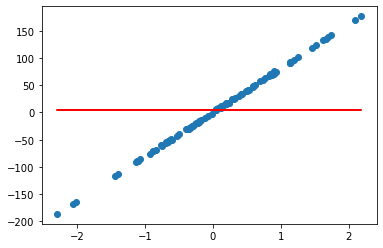

In [194]:
sigma = np.ones(n)

S = np.sum(1/sigma**2)
Sx = np.sum(x/sigma**2)
Sxx = np.sum(x**2/sigma**2)
Sy = np.sum(y/sigma**2)
Sxy = np.sum((x*y)/sigma**2)

delta = (S * Sxx) - (Sx**2) 

a = (Sy*Sxx - Sx*Sxy)/delta
b = (S*Sxy - Sx*Sy)/delta 

plt.plot(x, a + b*x, 'r')
plt.scatter(x,y)




## Using numpy lib for linear regression

In [195]:
x1 = x.reshape(len(x))
A = np.vstack([x1, np.ones(len(x))]).T
a, b, rank, s = np.linalg.lstsq(A, y, rcond = None)



[&lt;matplotlib.lines.Line2D at 0x7fe1ade830a0&gt;,
 &lt;matplotlib.lines.Line2D at 0x7fe1ade83100&gt;]

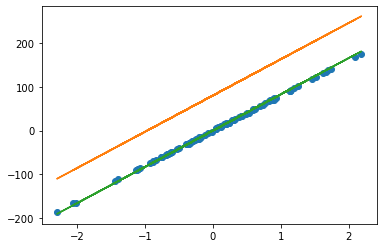

In [197]:
plt.plot(x, y, 'o', label = 'dataset markers')
plt.plot(x, a + b*x)